# Olá Vetores

Bem vindo a este notebook, nele exploraremos os vetores de palavras.
Em Processamento de Linguagem Natural, nós representamos cada palavra como um vetor de números.
Esse vetor codifica o significado das palavras. Esses números (ou pesos) para cada palavra são aprendidas usando várias modelos de algoritmos de machine learning, que nós iremos explorar com mais detalhes.

No mundo real você sempre pode carregar esses vetores de palavras treinados e quase nunca precisará treiná-los do zero. Neste notebook, você irá:

- Prever analogias entre palavras
- Usar PCA para reduzir a dimensionalidade das representações das palvras e irá plota-las em duas dimensões
- Comparar vetores de palavras usando medição de similaridade (Similaridade por cosseno)
- Entender como esses modelos de espaços vetoriais funcionam


## 1.0 Prever os países pela capital



Você está jogando um jogo de perguntas e respostas contra um aluno do segundo ano que acabou de fazer a prova de geografia e sabe todas as capitais de cor.
Graças à PNL, você conseguirá responder às perguntas corretamente. Em outras palavras, você escreverá um programa que pode lhe dar
o país pela sua capital. Dessa forma, você tem quase certeza de que vencerá o jogo de perguntas e respostas. Começaremos explorando o conjunto de dados.


###  1.1 Importando os dados

Comoo usualmente, iremos começar importando bibliotecas essenciais do Python e carregar os conjuntos de dados

O conjunto de dados vai ser carregado como um [Dataframe do Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html), que é um método muito comum em ciência de dados. Isso pode levar alguns minutos pois é um conjunto de dados de tamanho grande


In [ ]:
# Importando as bibliotecas
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import get_vectors

In [ ]:
data = pd.read_csv('capitals.txt', delimiter=' ')
data.columns = ['city1', 'country1', 'city2', 'country2']

#Imprime os primeiros 5 elementos do DataFrame
data.head(5)

,city1,country1,city2,country2
0,Athens,Greece,Bangkok,Thailand
1,Athens,Greece,Beijing,China
2,Athens,Greece,Berlin,Germany
3,Athens,Greece,Bern,Switzerland
4,Athens,Greece,Cairo,Egypt


***

### Para Executar Este Código na Sua Própria Máquina:
Observe que, como o conjunto de dados original de embeddings de palavras do Google News tem cerca de 3,64 gigabytes,
o ambiente de trabalho não consegue lidar com o arquivo completo. Por isso, fizemos o download do conjunto completo,
extraímos uma amostra das palavras que vamos analisar nesta atividade e salvamos em um arquivo pickle chamado `word_embeddings_capitals.p`

Se você quiser baixar o conjunto de dados completo por conta própria e escolher seu próprio conjunto de embeddings de palavras,
consulte as instruções e um código auxiliar.

- Baixe o conjunto de dados nesta [página](https://code.google.com/archive/p/word2vec/).
- Procure na página por 'GoogleNews-vectors-negative300.bin.gz' e clique no link para fazer o download.


Copie e cole o código abaixo e execute-o em sua máquina local após baixar
o conjunto de dados para o mesmo diretório do notebook.

```python
import nltk
from gensim.models import KeyedVectors


embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)
f = open('capitals.txt', 'r').read()
set_words = set(nltk.word_tokenize(f))
select_words = words = ['king', 'queen', 'oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
for w in select_words:
    set_words.add(w)

def get_word_embeddings(embeddings):

    word_embeddings = {}
    for word in embeddings.vocab:
        if word in set_words:
            word_embeddings[word] = embeddings[word]
    return word_embeddings


# Testing your function
word_embeddings = get_word_embeddings(embeddings)
print(len(word_embeddings))
pickle.dump( word_embeddings, open( "word_embeddings_subset.p", "wb" ) )
```

***

Agora vamos carregar o word embbeding como um [dicionário Python](https://docs.python.org/3/tutorial/datastructures.html#dictionaries).
Como dito, estes já foram obtidos por meio de um algoritmo de aprendizado de máquina.

In [ ]:
word_embeddings = pickle.load(open("word_embeddings_subset.p", "rb"))
len(word_embeddings)

243

Cada word embedding é um vetor 300-dimensional

In [ ]:
print("dimension: {}".format(word_embeddings['Spain'].shape[0]))

dimension: 300


### Prever relações entre palavras

Agora você escreverá uma função que usará o embedding de palavras para prever relações entre palavras.
* A função receberá como entrada três palavras.
* As duas primeiras estão relacionadas entre si.
* Ela preverá uma quarta palavra que está relacionada à terceira palavra de maneira semelhante à relação entre as duas primeiras palavras.
* Por exemplo, "Atenas está para a Grécia assim como Bangkok está para ______"?
* Você escreverá um programa capaz de encontrar a quarta palavra.
* Daremos uma dica para mostrar como calcular isso.

Uma analogia semelhante seria a seguinte:

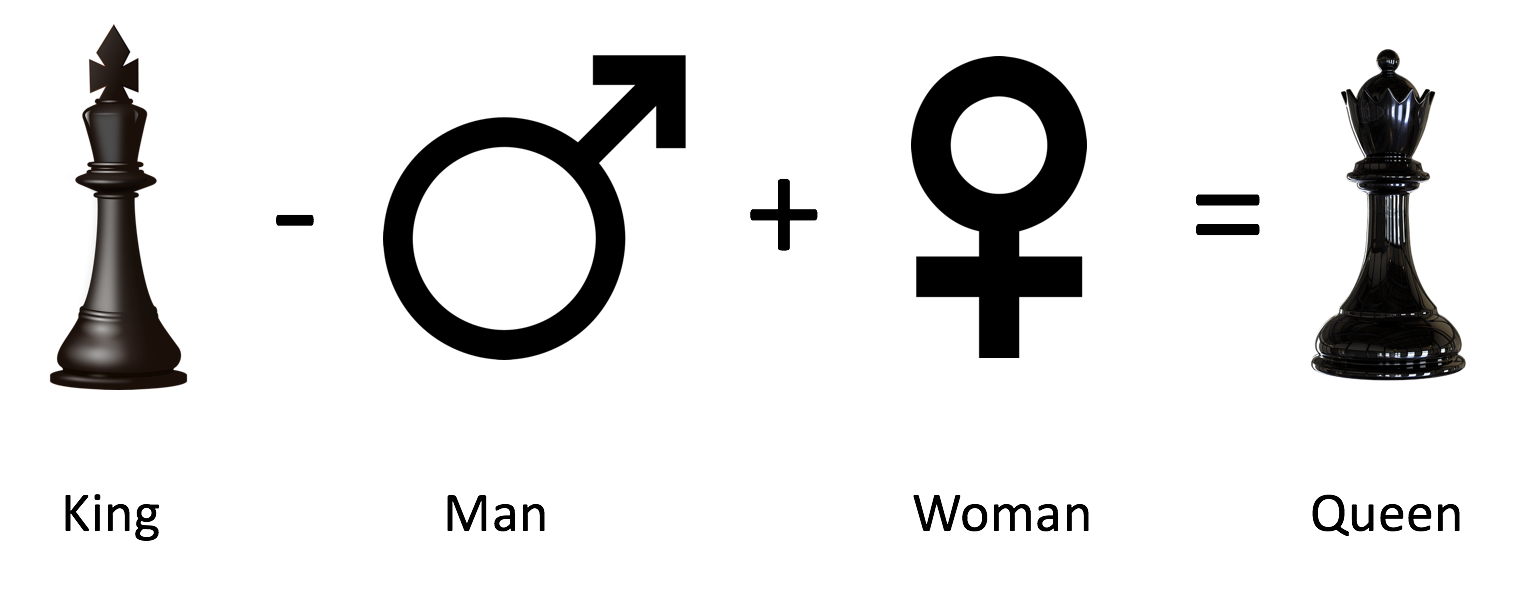

Você implementará uma função que pode informar a capital de um país.
Você deve usar a mesma metodologia mostrada na figura acima. Para fazer isso,
você primeiro calculará a métrica de similaridade do cosseno ou a distância euclidiana.

### 1.2 Similaridade de Cosseno

A função de similaridade do cosseno é:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$A$ e $B$ representam os vetores de palavras e $A_i$ ou $B_i$ representa o índice i desse vetor.
&Note que se A e B são idênticos, você terá $cos(\theta) = 1$.
* Por outro lado, se eles forem totalmente opostos, ou seja, $A= -B$, então você terá, $cos(\theta) = -1$.
* Se você ter $cos(\theta) =0$, isso significa que eles são ortogonais (ou perpendicular).
* Números entre 0 e 1 indica a pontuação de similaridade.
* Números entre -1 - 0 indica a pontuação de dissimilaridade.

**Instruções**: Implemente a função que pege dois vetores de palavras e compute a similaridade

<details>
<summary>
    <font size="3" color="darkgreen"><b>Dica</b></font>
</summary>
<p>
<ul>
    <li> Python's<a href="https://docs.scipy.org/doc/numpy/reference/" > Biblioteca NumPy  </a> suporte para operações algébricas. </li>
    <li>Use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html" > numpy.dot </a>.</li>
    <li>Use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html">numpy.linalg.norm </a>.</li>
</ul>
</p>

In [ ]:
def cosine_similarity(A, B):
    '''
    Input:
        A: Um array numpy que corresponde a o vetor de palavras
        B: Um array numpy que corresponde a o vetor de palavras
    Output:
        cos: número que corresponde a similaridade de cosseno entre A e B.
    '''


    dot = np.dot(A,B)
    norma = np.sqrt(np.dot(A,A))
    normb = np.sqrt(np.dot(B,B))
    cos = dot / (norma*normb)

    return cos

In [ ]:
# Sinta-se livre para testar outras palavras
king = word_embeddings['king']
queen = word_embeddings['queen']

cosine_similarity(king, queen)

np.float32(0.6510956)

### 1.3 Distância Euclidiana

Você ira implementar uma função que computa a similaridade entre 2 vetores usando Distância Euclidiana.


Definida como:

$$ \begin{aligned} d(\mathbf{A}, \mathbf{B})=d(\mathbf{B}, \mathbf{A}) &=\sqrt{\left(A_{1}-B_{1}\right)^{2}+\left(A_{2}-B_{2}\right)^{2}+\cdots+\left(A_{n}-B_{n}\right)^{2}} \\ &=\sqrt{\sum_{i=1}^{n}\left(A_{i}-B_{i}\right)^{2}} \end{aligned}$$

* $n$ número de elementos no vetor
* $A$ e $B$ são corresponentes aos vetores de palavras.
* Quanto mais similar, mais o valor se aproxima de 0.

**Instruções**: Escreva uma função que compute a Distância Euclidiana entre 2 vetores

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Dicas</b></font>
</summary>
<p>
<ul>
    <li>Use <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html" > numpy.linalg.norm </a>.</li>
</ul>
</p>

In [ ]:
def euclidean(A, B):
    """
    Input:
        A: Um array numpy que corresponde a o vetor de palavras
        B: Um array numpy que corresponde a o vetor de palavras
    Output:
        d: Número que representa a distância Euclidiana entre A e B.
    """

    d = np.linalg.norm(A-B)

    return d


In [ ]:
# Teste a função
euclidean(king, queen)

np.float32(2.4796925)

### 1.4 Encontrando o país de cada capital

Agora, você usará as funções anteriores para calcular similaridades entre vetores,  
e usará isso para encontrar as capitais dos países. Você escreverá uma função que  
recebe três palavras e o dicionário de embeddings. Sua tarefa é encontrar as  
capitais dos países. Por exemplo, dadas as seguintes palavras:

- 1: Atenas 2: Grécia 3: Bagdá,

sua tarefa é prever o país 4: Iraque.

**Instruções**:

1. Para prever a capital, você pode querer olhar para o exemplo *Rei - Homem + Mulher = Rainha* acima, e implementar esse esquema em uma função matemática, usando os embeddings de palavras e uma função de similaridade.

2. Itere sobre o dicionário de embeddings e calcule a pontuação de similaridade do cosseno entre seu vetor e o embedding da palavra atual.

3. Você deve adicionar uma verificação para garantir que a palavra retornada não seja nenhuma das palavras fornecidas à sua função. Retorne aquela com a maior pontuação.


In [ ]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def get_country(city1, country1, city2, embeddings):
    """
    Entrada:
        city1: uma string (a capital do país1)
        country1: uma string (o país da capital1)
        city2: uma string (a capital do país2)
        embeddings: um dicionário onde as chaves são palavras e os valores são seus embeddings
    Saída:
        countries: um dicionário com o país mais provável e sua pontuação de similaridade
    """


    # armazena city1, country1 e city2 em um conjunto chamado group
    group = set((city1, country1, city2))

    # obtém o embedding de city1
    city1_emb = word_embeddings[city1]

    # obtém o embedding de country1
    country1_emb = word_embeddings[country1]

    # obtém o embedding de city2
    city2_emb = word_embeddings[city2]

    # calcula o vetor para country2 (usando a combinação dos embeddings de country1, city1 e city2)
    # Lembre-se: Rei - Homem + Mulher = Rainha
    vec = country1_emb - city1_emb + city2_emb

    # inicializa a similaridade com -1 (será substituída por valores mais próximos de +1)
    similarity = -1

  # inicializa a variável country como string vazia
    country = ''

    # percorre todas as palavras no dicionário de embeddings
    for word in embeddings.keys():

        # primeiro verifica se a palavra não está no conjunto 'group'
        if word not in group:

            # obtém o embedding da palavra
            word_emb = word_embeddings[word]

            # calcula a similaridade do cosseno entre o vetor calculado e o embedding da palavra
            cur_similarity = cosine_similarity(vec, word_emb)

            # se a similaridade atual for maior que a anterior...
            if cur_similarity > similarity:

               # atualiza a similaridade para a nova, mais alta
                similarity = cur_similarity

                # armazena o país como uma tupla com a palavra e a similaridade
                country = (word, similarity)

    return country


In [ ]:
get_country('Athens', 'Greece', 'Cairo', word_embeddings)

('Egypt', np.float32(0.7626821))

### 1.5 Acurácia do modelo

Agora voce vai testar essa nova função no dataset e validar a acurácia do modelo:

$$\text{Accuracy}=\frac{\text{Predições corretas #}}{\text{Total # predições}}$$

**Instruções**: Escreva um programa que possa calcular a acurácia no conjunto de dados fornecido para você.  
Você deve iterar sobre cada linha para obter as palavras correspondentes e passá-las para a sua função `get_country` acima.


In [ ]:
def get_accuracy(word_embeddings, data):
    '''
    Entrada:
        word_embeddings: um dicionário onde a chave é uma palavra e o valor é seu embedding
        data: um dataframe do pandas contendo todos os pares de países e capitais

    Saída:
        accuracy: a acurácia do modelo
    '''

    # inicializa o número de acertos como zero
    num_correct = 0

    # percorre as linhas do dataframe
    for i, row in data.iterrows():

        # obtém city1
        city1 = row['city1']

        # obtém country1
        country1 = row['country1']

        # obtém city2
        city2 =  row['city2']

        # obtém country2
        country2 = row['country2']

        # usa a função get_country para encontrar o country2 previsto
        predicted_country2, _ = get_country(city1, country1, city2, word_embeddings)

        # se o country2 previsto for igual ao country2 real...
        if predicted_country2 == country2:
            # incrementa o número de acertos em 1
            num_correct += 1

    # obtém o número de linhas no dataframe data (tamanho do dataframe)
    m = len(data)

    # calcula a acurácia dividindo o número de acertos por m
    accuracy = num_correct / m


    return accuracy


In [ ]:
accuracy = get_accuracy(word_embeddings, data)
print(f"Acurácia é {accuracy:.2f}")

Accuracy is 0.92


**Expected Output:**

$\approx$ 0.92

# 3.0 Plotando os vetores usando PCA

Agora você irá explorar a distância entre vetores de palavras após reduzir sua dimensão.  
A técnica que utilizaremos é conhecida como  
[*análise de componentes principais* (PCA)](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais).  
Como vimos, estamos trabalhando em um espaço de 300 dimensões neste caso.  
Embora, do ponto de vista computacional, sejamos capazes de realizar um bom trabalho,  
é impossível visualizar resultados em espaços de dimensões tão altas.

Você pode pensar no PCA como um método que projeta nossos vetores em um espaço de  
dimensão reduzida, mantendo o máximo de informação sobre os vetores originais  
em suas versões reduzidas. Neste caso, por *máxima informação* queremos dizer que a  
distância Euclidiana entre os vetores originais e seus correspondentes projetados  
é mínima. Assim, vetores que eram originalmente próximos no dicionário de embeddings  
produzirão vetores de dimensão menor que ainda estarão próximos entre si.

Você verá que, ao mapear as palavras, palavras semelhantes ficarão agrupadas  
umas próximas das outras. Por exemplo, as palavras 'triste', 'feliz', 'alegre'  
descrevem emoções e devem aparecer próximas quando plotadas.  
Palavras como: 'óleo', 'gás' e 'petróleo' descrevem recursos naturais.  
Palavras como 'cidade', 'vila', 'município' podem ser vistas como sinônimos e  
descrevem coisas semelhantes.

Antes de plotar as palavras, você precisa primeiro ser capaz de reduzir cada vetor  
de palavra com PCA para 2 dimensões e então plotá-lo. Os passos para calcular o PCA são os seguintes:

1. Normalizar os dados pela média  
2. Calcular a matriz de covariância dos dados ($\Sigma$).  
3. Calcular os autovetores e autovalores da matriz de covariância  
4. Multiplicar os K primeiros autovetores pelos dados normalizados. A transformação deve parecer com o seguinte:

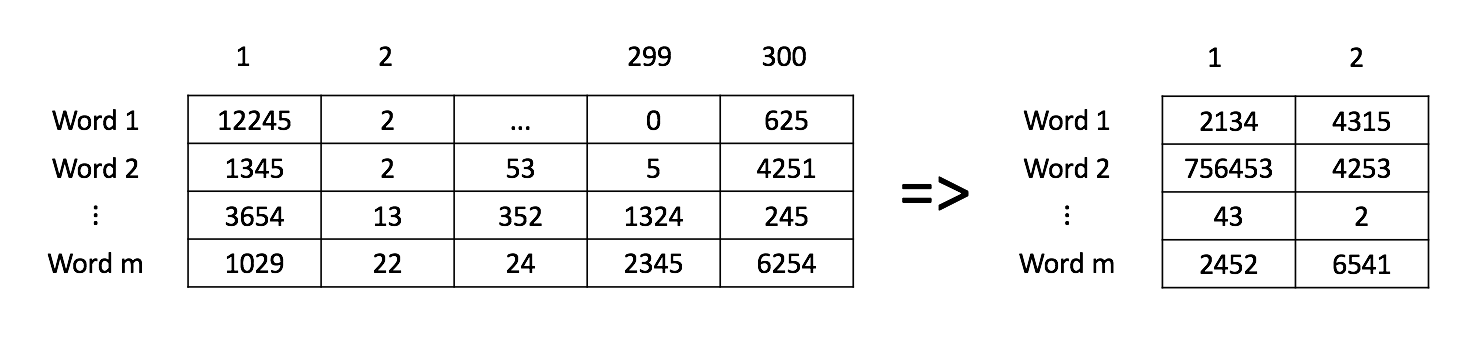


**Instruções**:

Você irá escrever um programa que recebe um conjunto de dados onde cada linha corresponde a um vetor de palavra.  
* Os vetores de palavras possuem dimensão 300.  
* Use PCA para reduzir as 300 dimensões para `n_components` dimensões.  
* A nova matriz deve ter dimensão `m, n_components`.

* Primeiro, centralize os dados subtraindo a média  
* Obtenha os autovalores usando `linalg.eigh`. Use `eigh` em vez de `eig`, pois R é simétrica. O ganho de desempenho ao usar `eigh` em vez de `eig` é significativo.  
* Ordene os autovetores e autovalores em ordem decrescente dos autovalores.  
* Pegue um subconjunto dos autovetores (escolha quantos componentes principais você quer usar com base em `n_components`).  
* Retorne a nova transformação dos dados multiplicando os autovetores pelos dados originais.


In [ ]:
def compute_pca(X, n_components=2):
    """
    Entrada:
        X: de dimensão (m,n), onde cada linha corresponde a um vetor de palavra
        n_components: número de componentes que você deseja manter.
    Saída:
        X_reduced: dados transformados em 2 dimensões/colunas + dados originais regenerados
    """

    # centraliza os dados subtraindo a média
    X_demeaned = X - np.mean(X, axis=0)
    print('X_demeaned.shape: ', X_demeaned.shape)

    # calcula a matriz de covariância
    covariance_matrix = np.cov(X_demeaned, rowvar=False)

    # calcula os autovalores e autovetores da matriz de covariância
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')

    # ordena os autovalores em ordem crescente (obtém os índices da ordenação)
    idx_sorted = np.argsort(eigen_vals)

    # inverte a ordem para que fique do maior para o menor
    idx_sorted_decreasing = idx_sorted[::-1]

    # ordena os autovalores com base em idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]

    # ordena os autovetores usando os índices idx_sorted_decreasing
    eigen_vecs_sorted = eigen_vecs[:, idx_sorted_decreasing]

    # seleciona os primeiros n autovetores (n é a dimensão desejada
    # dos dados reescalados, ou dims_rescaled_data)
    eigen_vecs_subset = eigen_vecs_sorted[:, 0:n_components]

    # transforma os dados multiplicando a transposta dos autovetores
    # pela transposta dos dados centralizados pela média
    # Depois, tira a transposta do resultado.
    X_reduced = np.dot(eigen_vecs_subset.transpose(), X_demeaned.transpose()).transpose()


    return X_reduced


In [ ]:
# Testing your function
np.random.seed(1)
X = np.random.rand(3, 10)
#print(X)
X_reduced = compute_pca(X, n_components=2)
print("Sua matriz original era " + str(X.shape) + " e se tornou:")
print(X_reduced)

X_demeaned.shape:  (3, 10)
Sua matriz original era (3, 10) e se tornou:
[[ 0.43437323 -0.49820384]
 [ 0.42077249  0.50351448]
 [-0.85514571 -0.00531064]]


**Saída Esperada:**

Sua matriz original era: (3,10) e se tornou:

<table>
    <tr>
        <td>
           0.43437323
            </td>
                <td>
            0.49820384
            </td>
    </tr>
    <tr>
        <td>
            0.42077249
            </td>
                <td>
           -0.50351448
            </td>
    </tr>
    <tr>
        <td>
            -0.85514571
            </td>
                <td>
           0.00531064
            </td>
    </tr>
</table>

Agora você usará sua função PCA para plotar algumas palavras que escolhemos para você.  
Você verá que palavras semelhantes tendem a ficar agrupadas próximas umas das outras.  
Às vezes, até mesmo antônimos tendem a ficar agrupados próximos. Antônimos  
descrevem a mesma coisa, mas em lados opostos da escala.  
Eles geralmente aparecem na mesma posição de uma frase,  
possuem a mesma classe gramatical e, assim, ao  
aprender os vetores de palavras, acabamos obtendo pesos semelhantes. Na próxima semana  
veremos como eles são aprendidos, mas por enquanto vamos apenas aproveitar o uso deles.

**Instruções:** Execute a célula abaixo.


In [ ]:
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town',
         'village', 'country', 'continent', 'petroleum', 'joyful']


X = get_vectors(word_embeddings, words)

print('Você tem 11 palkavras, cada uma com 300 dimensões por isso X.shape é:', X.shape)

Você tem 11 palkavras, cada uma com 300 dimensões por isso X.shape é: (11, 300)


X_demeaned.shape:  (11, 300)


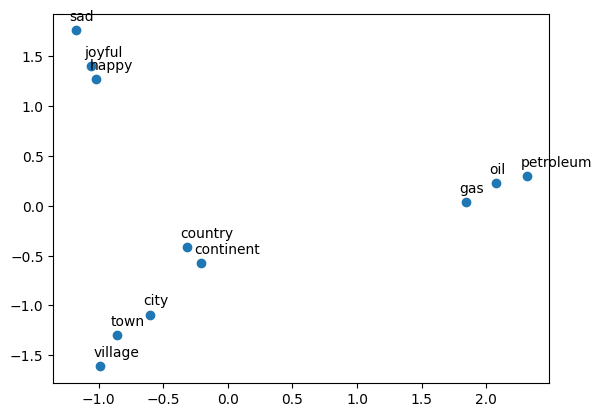

In [ ]:
result = compute_pca(X, 2)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0] - 0.05, result[i, 1] + 0.1))

plt.show()

**O que você percebe?**

Os vetores das palavras 'gás', 'óleo' e 'petróleo' parecem relacionados entre si,  
porque seus vetores estão próximos uns dos outros. Da mesma forma, 'triste', 'alegre'  
e 'feliz' expressam emoções e também estão próximos uns dos outros.
